In [145]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb
import tensorflow as tf

In [146]:
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [147]:
dataset=pd.read_csv(r'D:\ML\Ahmad codes\Facies_Cluster_Python.csv')

# EDA

In [148]:
dataset.head()

,X,Y,Time,Cosine_phase,Frequency,Env,Chaos
0,615622.09,6081332.80,-983.60,0.74,37.31,4693.80,0.01
1,615647.08,6081333.50,-983.52,0.79,36.79,4086.40,0.01
2,615672.07,6081334.19,-983.54,0.81,35.55,4116.56,0.02
3,615697.06,6081334.89,-983.60,0.83,34.06,3722.15,0.02
4,615722.05,6081335.59,-983.65,0.83,31.40,3284.62,0.03


In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10201 entries, 0 to 10200
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             10201 non-null  float64
 1   Y             10201 non-null  float64
 2   Time          10201 non-null  float64
 3   Cosine_phase  10201 non-null  float64
 4   Frequency     10201 non-null  float64
 5   Env           10201 non-null  float64
 6   Chaos         10201 non-null  float64
dtypes: float64(7)
memory usage: 558.0 KB


In [150]:
dataset.describe()

,X,Y,Time,Cosine_phase,Frequency,Env,Chaos
count,10201.000000,1.020100e+04,10201.000000,10201.000000,10201.000000,10201.000000,10201.000000
mean,616836.737228,6.082617e+06,-960.395826,0.622605,39.251512,3034.031309,0.020716
std,728.954314,7.289189e+02,13.471907,0.338158,7.366454,1173.455989,0.016804
min,615552.190000,6.081333e+06,-989.750000,-1.030000,23.040000,105.390000,0.000000
25%,616206.180000,6.081987e+06,-972.720000,0.490000,33.760000,2212.960000,0.010000
50%,616836.740000,6.082617e+06,-958.910000,0.730000,37.770000,2988.690000,0.020000
75%,617467.300000,6.083248e+06,-949.360000,0.860000,43.660000,3734.480000,0.030000
max,618121.280000,6.083902e+06,-934.880000,1.030000,88.220000,6713.930000,0.180000


In [151]:
dataset.shape

(10201, 7)

In [152]:
dataset.columns

Index(['X', 'Y', 'Time', 'Cosine_phase', 'Frequency', 'Env', 'Chaos'], dtype='object')

In [153]:
dataset.dtypes

X               float64
Y               float64
Time            float64
Cosine_phase    float64
Frequency       float64
Env             float64
Chaos           float64
dtype: object

# Using k-means for unsupervised clustering

In [154]:
from sklearn.cluster import KMeans

In [155]:
dataset_Att=dataset.iloc[:,3:].values

In [156]:
dataset_Att

array([[7.40000e-01, 3.73100e+01, 4.69380e+03, 1.00000e-02],
       [7.90000e-01, 3.67900e+01, 4.08640e+03, 1.00000e-02],
       [8.10000e-01, 3.55500e+01, 4.11656e+03, 2.00000e-02],
       ...,
       [6.90000e-01, 3.67500e+01, 3.01089e+03, 1.00000e-02],
       [7.30000e-01, 3.66500e+01, 3.07731e+03, 1.00000e-02],
       [7.70000e-01, 3.59500e+01, 3.10037e+03, 1.00000e-02]])

In [157]:
# apply again K-means with optimum number of classes
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans_3classes=kmeans.fit_predict(dataset_Att)
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans_4classes=kmeans.fit_predict(dataset_Att)

In [158]:
x=dataset.iloc[:,0].values
y=dataset.iloc[:,1].values
Time=dataset.iloc[:,2].values
Cosine_phase=dataset.iloc[:,3].values
Frequency=dataset.iloc[:,4].values
Env=dataset.iloc[:,5].values
Chaos=dataset.iloc[:,6].values

In [159]:
x

array([615622.09, 615647.08, 615672.07, ..., 618001.4 , 618026.4 ,
       618051.39])

In [160]:
y

array([6081332.8 , 6081333.5 , 6081334.19, ..., 6083900.37, 6083901.06,
       6083901.76])

Text(0, 0.5, 'Y')

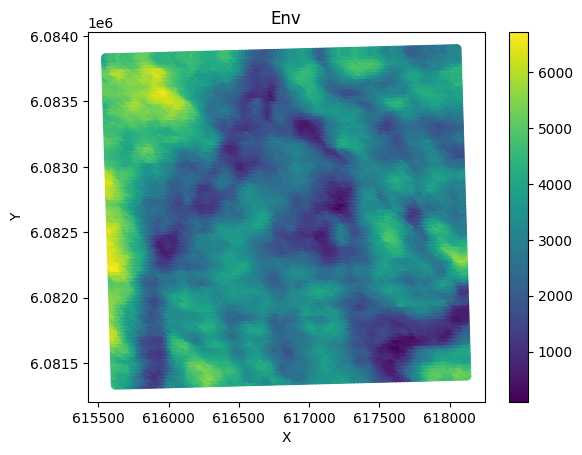

In [176]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=Env)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('Env')
plt.xlabel('X')
plt.ylabel('Y')


Text(0, 0.5, 'Y')

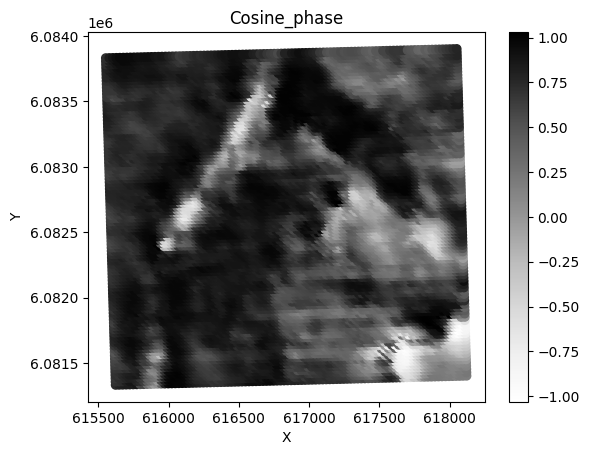

In [162]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=Cosine_phase, cmap=plt.cm.Greys)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('Cosine_phase')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

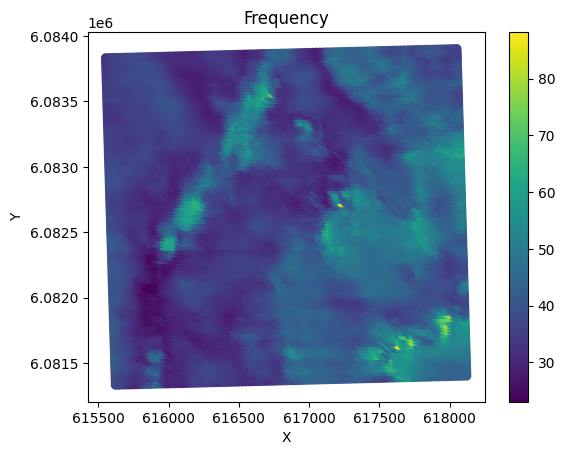

In [163]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=Frequency)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('Frequency')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

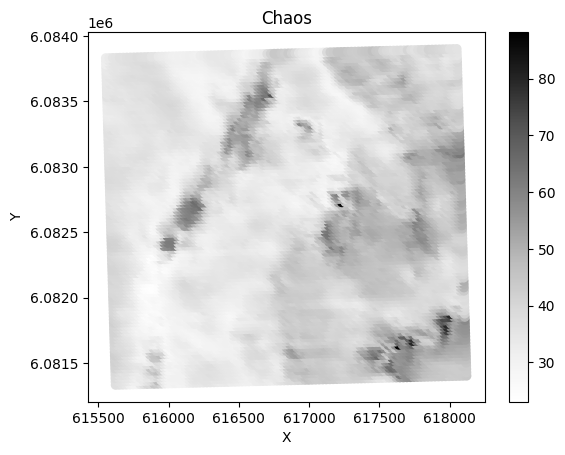

In [164]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=Frequency, cmap=plt.cm.Greys)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('Chaos')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

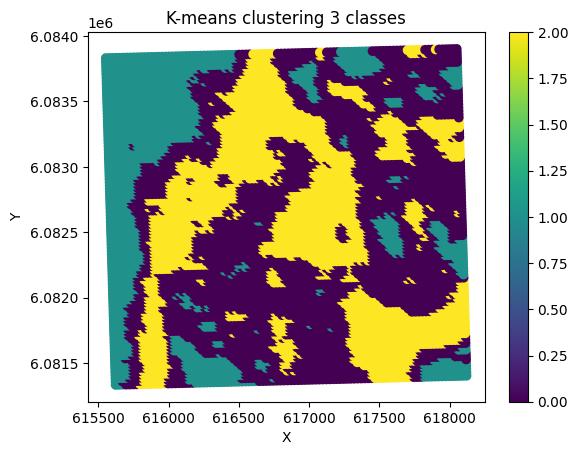

In [165]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=y_kmeans_3classes)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('K-means clustering 3 classes')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

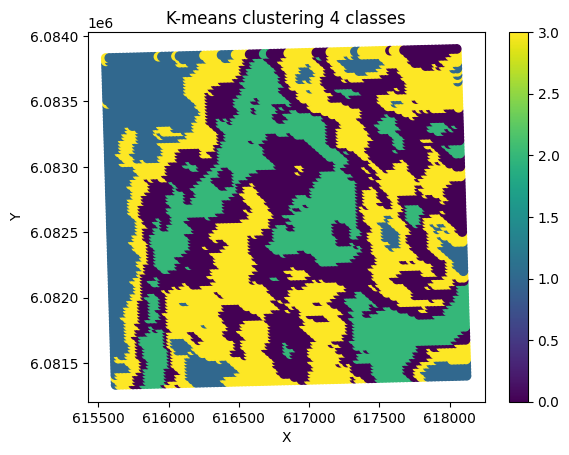

In [166]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=y_kmeans_4classes)
fig.colorbar(scat)
ax.margins(0.05)
plt.title('K-means clustering 4 classes')
plt.xlabel('X')
plt.ylabel('Y')

# Hierarchical  clusterig

In [167]:
from sklearn.cluster import AgglomerativeClustering

In [168]:
data = list(zip(Cosine_phase, Frequency,Env,Chaos))
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

In [169]:
len(labels)

10201

Text(0, 0.5, 'Y')

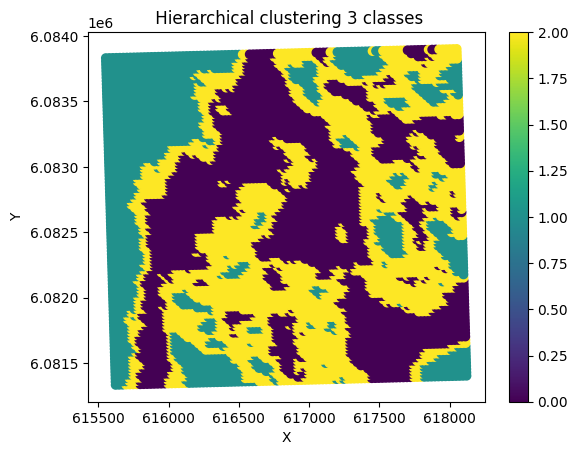

In [170]:
fig, ax = plt.subplots()
scat = ax.scatter(x, y, c=labels)
fig.colorbar(scat)
ax.margins(0.05)
plt.title(' Hierarchical clustering 3 classes')
plt.xlabel('X')
plt.ylabel('Y')